In [1]:
%load_ext autoreload
%autoreload 2

from string import ascii_uppercase
from random import choice
import sys
sys.path.append("../")

import cv2

import datagen.data_creation.augmentations as augs
from datagen.data_creation.fonts import Fonts

In [2]:
text = "M342A"
font = Fonts.getFont(Fonts.FONTS['UBUNTU_MONO'])

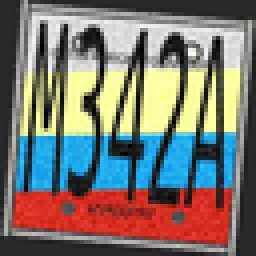

In [6]:
above_text = "".join([choice(' ' + ascii_uppercase) for _ in range(20)])
below_text = "".join([choice(ascii_uppercase) for _ in range(8)])
small_text_font = Fonts.getFont(Fonts.FONTS['UBUNTU_MONO'], 18)

hole_points = (70, 190, 40, 220)
dark_hole = (61, 60, 60, 255)
light_hole = (217, 217, 206)

background_augs = augs.AugmentationSequence(*[
    augs.BlankImage(text, font, (200, 200, 200, 255), 10),
    augs.Resize(256, 256),
    augs.Line((194, 22, 10,255), (128, 229), 70, (1,0.1)),
    augs.Line((7, 147, 222, 255), (128, 160), 70, (1,0.1)),
    augs.Line((249, 255, 135, 255), (128, 100), 70, (1,0.1)),
    augs.DrawText(below_text, small_text_font, offset=(0, 90)),
    augs.DrawText(above_text, small_text_font, offset=(0, -75)),
    augs.Hole((hole_points[0], hole_points[2]), 11, dark_hole),
    augs.Hole((hole_points[0], hole_points[2]), 6, light_hole),
    augs.Hole((hole_points[1], hole_points[2]), 11, dark_hole),
    augs.Hole((hole_points[1], hole_points[2]), 6, light_hole),
    augs.Hole((hole_points[0], hole_points[3]), 7, dark_hole),
    augs.Hole((hole_points[1], hole_points[3]), 7, dark_hole),
    augs.Line(dark_hole, (128, 5), 12),
    augs.Line(light_hole, (128, 5), 3),
    augs.Line(dark_hole, (128, 251), 12),
    augs.Line(light_hole, (128, 251), 3),
    augs.Line(dark_hole, (5, 128), 12, (0,1)),
    augs.Line(light_hole, (5, 128), 3, (0,1)),
    augs.Line(dark_hole, (251, 128), 12, (0,1)),
    augs.Line(light_hole, (251, 128), 3, (0,1)),
])

# display(background_augs())
img = augs.AugmentationSequence(*[
    augs.BlankImage(text, font, (0,0,0,0), (10)),
    augs.DrawText(text, font, offset=(0, -5)),
    augs.Resize(250, 280),
    augs.ApplyBackground(background_aug=background_augs),
    augs.StaticNoise(100),
    augs.RotateImage(10, (40, 40, 40, 255)),
    augs.Resize(64, 64, cv2.INTER_LINEAR),
    augs.Resize(256, 256, cv2.INTER_NEAREST),
])()

display(img)